In [12]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import time
import requests
from datetime import datetime
from config import weather_api_key


HTTP_STATUS_OK = 200
HTTP_STATUS_NOT_FOUND = 404

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)


In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Use the tuple() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(citipy.nearest_city(coordinate[0], coordinate[1]).city_name,
          citipy.nearest_city(coordinate[0], coordinate[1]).country_code)

hobart au
codrington ag
olga ru
baykit ru
hithadhoo mv
micheweni tz
novyy urengoy ru
safwah sa
amderma ru
fairbanks us
rambha in
chuy uy
georgetown sh
los llanos de aridane es
caravelas br
tuktoyaktuk ca
kwinana au
atuona pf
port alfred za
ciechanow pl
ponta do sol pt
marsh harbour bs
galiwinku au
saint-augustin ca
busselton au
barrow us
kahului us
victoria sc
amderma ru
albany au
jega ng
saint-francois gp
lompoc us
souillac mu
atuona pf
raca rs
chuy uy
albany au
raudeberg no
padang id
nikolskoye ru
lebu cl
rikitea pf
bengkulu id
rikitea pf
nanortalik gl
lebu cl
richards bay za
dharampur in
mataura pf
hasaki jp
warqla dz
mataura pf
rawson ar
tateyama jp
moctezuma mx
barentsburg sj
butaritari ki
kaeo nz
lagoa pt
lagoa pt
puerto ayora ec
jamestown sh
rikitea pf
busselton au
kangaatsiaq gl
taolanaro mg
bluff nz
alofi nu
kushiro jp
guerrero negro mx
jamestown sh
hilo us
strezhevoy ru
la ronge ca
butaritari ki
rikitea pf
korsakov ru
harper lr
georgetown sh
ushuaia ar
toliary mg
madera us
au

port alfred za
hobart au
san quintin mx
tasiilaq gl
elizabeth city us
mwinilunga zm
avarua ck
half moon bay us
albany au
tumannyy ru
punta arenas cl
hami cn
bluff nz
ifanadiana mg
busselton au
angoche mz
neulengbach at
avarua ck
atuona pf
maindargi in
mataura pf
barrow us
fortuna us
vanimo pg
torbay ca
oranjestad an
esperance au
hobart au
caravelas br
ambunti pg
bredasdorp za
pahrump us
san patricio mx
barrow us
kodiak us
taolanaro mg
hithadhoo mv
albany au
anicuns br
kruisfontein za
carnarvon au
sulangan ph
barrow us
cayenne gf
muzquiz mx
maumere id
mataura pf
namibe ao
debre tabor et
malpe in
mezen ru
coahuayana mx
rixheim fr
ochamchira ge
busselton au
illoqqortoormiut gl
albany au
punta arenas cl
fairbanks us
yellowknife ca
albany au
ushuaia ar
puerto ayora ec
haibowan cn
folldal no
mataura pf
poya nc
hithadhoo mv
sitka us
grindavik is
shingu jp
saint-philippe re
ushuaia ar
albany au
vaini to
formoso do araguaia br
butaritari ki
tselinnoye ru
torbay ca
sola vu
hermanus za
erenhot cn

nicoya cr
halalo wf
santa helena de goias br
ponta do sol cv
poum nc
necochea ar
itarema br
port alfred za
petropavlovsk-kamchatskiy ru
samusu ws
inta ru
illoqqortoormiut gl
fortuna us
castro cl
merauke id
lev tolstoy ru
hermanus za


In [8]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.

type(cities)

list

In [24]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1


# Loop through all the cities in the list.
for i, city in enumerate(cities):    

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    
    city_response = requests.get(city_url)
    status_code = city_response.status_code
# Run an API request for each of the cities.
    if status_code == HTTP_STATUS_OK:
        # Parse the JSON and retrieve data.
        city_weather = city_response.json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    elif status_code == HTTP_STATUS_NOT_FOUND:
        print("City not found. Skipping...")

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | hobart
Processing Record 2 of Set 1 | codrington
Processing Record 3 of Set 1 | olga
Processing Record 4 of Set 1 | baykit
Processing Record 5 of Set 1 | hithadhoo
Processing Record 6 of Set 1 | micheweni
Processing Record 7 of Set 1 | novyy urengoy
Processing Record 8 of Set 1 | safwah
City not found. Skipping...
Processing Record 9 of Set 1 | amderma
City not found. Skipping...
Processing Record 10 of Set 1 | fairbanks
Processing Record 11 of Set 1 | rambha
Processing Record 12 of Set 1 | chuy
Processing Record 13 of Set 1 | georgetown
Processing Record 14 of Set 1 | los llanos de aridane
Processing Record 15 of Set 1 | caravelas
Processing Record 16 of Set 1 | tuktoyaktuk
Processing Record 17 of Set 1 | kwinana
Processing Record 18 of Set 1 | atuona
Processing Record 19 of Set 1 | port alfred
Processing Record 20 of Set 1 | ciechanow
Processing Record 21 of Set 1 | ponta do sol
Processing Reco

Processing Record 39 of Set 4 | kushmurun
Processing Record 40 of Set 4 | komsomolskiy
Processing Record 41 of Set 4 | boddam
Processing Record 42 of Set 4 | ler
Processing Record 43 of Set 4 | narsaq
Processing Record 44 of Set 4 | grand centre
City not found. Skipping...
Processing Record 45 of Set 4 | vaini
Processing Record 46 of Set 4 | tsihombe
City not found. Skipping...
Processing Record 47 of Set 4 | mareeba
Processing Record 48 of Set 4 | khatanga
Processing Record 49 of Set 4 | new norfolk
Processing Record 50 of Set 4 | abu samrah
Processing Record 1 of Set 5 | carlsbad
Processing Record 2 of Set 5 | tahe
Processing Record 3 of Set 5 | qingyuan
Processing Record 4 of Set 5 | san cristobal
Processing Record 5 of Set 5 | paita
Processing Record 6 of Set 5 | raiganj
Processing Record 7 of Set 5 | irece
Processing Record 8 of Set 5 | kapaa
Processing Record 9 of Set 5 | talcahuano
Processing Record 10 of Set 5 | sakakah
Processing Record 11 of Set 5 | san quintin
Processing Rec

Processing Record 29 of Set 8 | sur
Processing Record 30 of Set 8 | miracema do tocantins
Processing Record 31 of Set 8 | samalaeulu
City not found. Skipping...
Processing Record 32 of Set 8 | tiarei
Processing Record 33 of Set 8 | elizabeth city
Processing Record 34 of Set 8 | mwinilunga
Processing Record 35 of Set 8 | tumannyy
City not found. Skipping...
Processing Record 36 of Set 8 | hami
Processing Record 37 of Set 8 | ifanadiana
Processing Record 38 of Set 8 | angoche
Processing Record 39 of Set 8 | neulengbach
Processing Record 40 of Set 8 | maindargi
Processing Record 41 of Set 8 | vanimo
Processing Record 42 of Set 8 | oranjestad
Processing Record 43 of Set 8 | esperance
Processing Record 44 of Set 8 | ambunti
Processing Record 45 of Set 8 | pahrump
Processing Record 46 of Set 8 | kodiak
Processing Record 47 of Set 8 | anicuns
Processing Record 48 of Set 8 | sulangan
Processing Record 49 of Set 8 | cayenne
Processing Record 50 of Set 8 | muzquiz
City not found. Skipping...
Pro

Processing Record 15 of Set 12 | sainte-suzanne
Processing Record 16 of Set 12 | ewa beach
Processing Record 17 of Set 12 | reitz
Processing Record 18 of Set 12 | borzya
Processing Record 19 of Set 12 | lahore
Processing Record 20 of Set 12 | sakaraha
Processing Record 21 of Set 12 | ingham
Processing Record 22 of Set 12 | fevralsk
City not found. Skipping...
Processing Record 23 of Set 12 | le vauclin
Processing Record 24 of Set 12 | tuatapere
Processing Record 25 of Set 12 | srednekolymsk
Processing Record 26 of Set 12 | merauke
Processing Record 27 of Set 12 | los boquerones
Processing Record 28 of Set 12 | tashtagol
Processing Record 29 of Set 12 | alem paraiba
Processing Record 30 of Set 12 | hirado
Processing Record 31 of Set 12 | blagodatnoye
Processing Record 32 of Set 12 | melipilla
Processing Record 33 of Set 12 | kashi
Processing Record 34 of Set 12 | san rafael
Processing Record 35 of Set 12 | uniontown
Processing Record 36 of Set 12 | nawalgarh
Processing Record 37 of Set 

In [25]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)


In [26]:
city_data_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Hobart,-42.8794,147.3294,60.66,61,75,1.99,AU,2022-03-09 23:48:44
1,Codrington,-38.2667,141.9667,61.14,63,87,13.09,AU,2022-03-09 23:48:44
2,Olga,43.7444,135.2892,36.97,55,3,2.71,RU,2022-03-09 23:48:45
3,Baykit,61.6700,96.3700,-23.89,100,94,2.44,RU,2022-03-09 23:48:45
4,Hithadhoo,-0.6000,73.0833,82.40,61,45,4.88,MV,2022-03-09 23:48:46
...,...,...,...,...,...,...,...,...,...
561,Santa Helena De Goias,-17.8136,-50.5969,74.61,65,45,2.37,BR,2022-03-10 00:06:14
562,Itarema,-2.9248,-39.9167,80.20,81,63,12.55,BR,2022-03-10 00:06:15
563,Petropavlovsk-Kamchatskiy,53.0452,158.6483,30.79,80,75,6.71,RU,2022-03-10 00:06:15
564,Inta,66.0317,60.1659,-12.73,100,97,5.73,RU,2022-03-10 00:06:16


In [22]:
# wiki = requests.get("https://en.wikipedia.org/wiki/Doja_Cat")
# wiki.status_code

In [23]:
# wiki.text

In [28]:
# Next, we'll reorder the columns as City, Country, Date, Lat, Lng, Max Temp, Humidity, Cloudiness, and Wind Speed, so they are easy to read.
new_column_order = ["City", "Country", "Date","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Hobart,AU,2022-03-09 23:48:44,-42.8794,147.3294,60.66,61,75,1.99
1,Codrington,AU,2022-03-09 23:48:44,-38.2667,141.9667,61.14,63,87,13.09
2,Olga,RU,2022-03-09 23:48:45,43.7444,135.2892,36.97,55,3,2.71
3,Baykit,RU,2022-03-09 23:48:45,61.6700,96.3700,-23.89,100,94,2.44
4,Hithadhoo,MV,2022-03-09 23:48:46,-0.6000,73.0833,82.40,61,45,4.88
...,...,...,...,...,...,...,...,...,...
561,Santa Helena De Goias,BR,2022-03-10 00:06:14,-17.8136,-50.5969,74.61,65,45,2.37
562,Itarema,BR,2022-03-10 00:06:15,-2.9248,-39.9167,80.20,81,63,12.55
563,Petropavlovsk-Kamchatskiy,RU,2022-03-10 00:06:15,53.0452,158.6483,30.79,80,75,6.71
564,Inta,RU,2022-03-10 00:06:16,66.0317,60.1659,-12.73,100,97,5.73


In [29]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [30]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

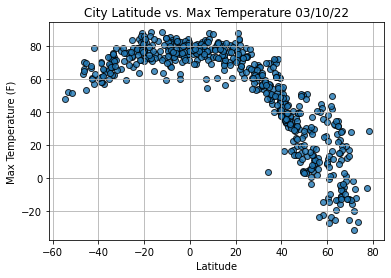

In [33]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

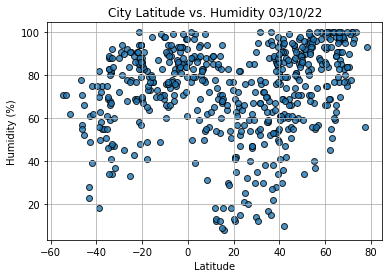

In [34]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

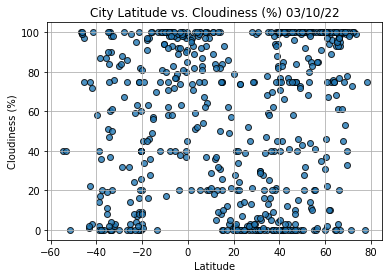

In [35]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

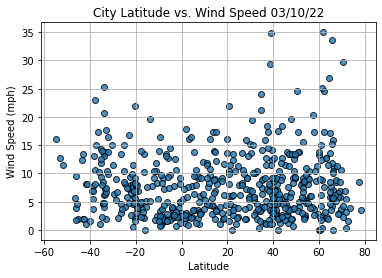

In [36]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()